In [1]:
import numpy as np

In [7]:
from pandas import DataFrame
import pandas as pd

In [15]:
data = pd.read_csv('E:\jupyter_notebook\Machine learning algorithms\MLiA_SourceCode\machinelearninginaction\Ch02\datingTestSet.txt',header=None, sep='\t')
data.columns=['fly_distance','video_game_percent','ice_cream_consumption','type']
data

,fly_distance,video_game_percent,ice_cream_consumption,type
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike
...,...,...,...,...
995,11145,3.410627,0.631838,smallDoses
996,68846,9.974715,0.669787,didntLike
997,26575,10.650102,0.866627,largeDoses
998,48111,9.134528,0.728045,largeDoses


In [16]:
data.mean()

fly_distance             33635.421000
video_game_percent           6.559961
ice_cream_consumption        0.832073
dtype: float64

In [17]:
data.std()

fly_distance             21957.006833
video_game_percent           4.243618
ice_cream_consumption        0.497239
dtype: float64

* 数据归一化包括两种方法，(x-xmin)/(x-xmax), (x-mean)/std

In [21]:
data.min(), data.max()

(fly_distance                     0
 video_game_percent             0.0
 ice_cream_consumption     0.001156
 type                     didntLike
 dtype: object,
 fly_distance                  91273
 video_game_percent        20.919349
 ice_cream_consumption      1.695517
 type                     smallDoses
 dtype: object)

In [25]:
data[['fly_distance','video_game_percent','ice_cream_consumption']] = ((data[['fly_distance','video_game_percent','ice_cream_consumption']]-data[['fly_distance','video_game_percent','ice_cream_consumption']].min()) / (data[['fly_distance','video_game_percent','ice_cream_consumption']].max()-data[['fly_distance','video_game_percent','ice_cream_consumption']].min()))
data

,fly_distance,video_game_percent,ice_cream_consumption,type
0,0.448325,0.398051,0.562334,largeDoses
1,0.158733,0.341955,0.987244,smallDoses
2,0.285429,0.068925,0.474496,didntLike
3,0.823201,0.628480,0.252489,didntLike
4,0.420102,0.079820,0.078578,didntLike
...,...,...,...,...
995,0.122106,0.163037,0.372224,smallDoses
996,0.754287,0.476818,0.394621,didntLike
997,0.291159,0.509103,0.510795,largeDoses
998,0.527111,0.436655,0.429005,largeDoses


In [42]:
data['type'][data['type']=='didntLike'] = 0
data['type'][data['type']=='smallDoses'] = 1
data['type'][data['type']=='largeDoses'] = 2
data

d:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
d:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,fly_distance,video_game_percent,ice_cream_consumption,type
0,0.448325,0.398051,0.562334,2
1,0.158733,0.341955,0.987244,1
2,0.285429,0.068925,0.474496,0
3,0.823201,0.628480,0.252489,0
4,0.420102,0.079820,0.078578,0
...,...,...,...,...
995,0.122106,0.163037,0.372224,1
996,0.754287,0.476818,0.394621,0
997,0.291159,0.509103,0.510795,2
998,0.527111,0.436655,0.429005,2


d:\python\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  if __name__ == '__main__':


Text(0.5, 0, 'fly_distance')

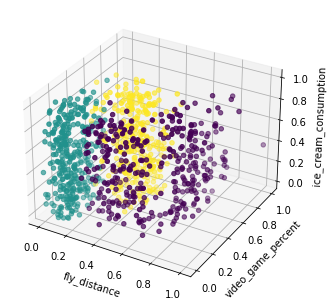

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fly_distance = data[['fly_distance']]
video_game_percent = data[['video_game_percent']]
ice_cream_consumption = data[['ice_cream_consumption']]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(fly_distance, video_game_percent, ice_cream_consumption, c=data[['type']])

ax.set_zlabel('ice_cream_consumption', fontdict={'size': 10, 'color': 'black'})
ax.set_ylabel('video_game_percent', fontdict={'size': 10, 'color': 'black'})
ax.set_xlabel('fly_distance', fontdict={'size': 10, 'color': 'black'})

* 为了提高大数据中KNN的效率，可以构建kd树，这个后续再优化

In [146]:
err_count = 0

In [151]:
def classify(train_data, test_data, k):
    err_count = 0
    for i in range(test_data.shape[0]):
        distance_frame = (train_data[['fly_distance','video_game_percent','ice_cream_consumption']]-test_data.iloc[i][['fly_distance','video_game_percent','ice_cream_consumption']])**2
        total_distance = DataFrame(distance_frame.sum(axis=1), columns=['distance'])
        total_distance = pd.concat([total_distance, data[['type']]], axis=1)
        result = total_distance.sort_values(by='distance')
        print('预测标签为:{},实际标签为:{}'.format(result.loc[:k-1][['type']].mode()['type'][0], test_data.iloc[i]['type']))
        if result.loc[:k-1][['type']].mode()['type'][0] != test_data.iloc[i]['type']:
            err_count += 1
    print('识别错误率为：{}'.format(err_count / test_data.shape[0]))

In [152]:
classify(data, data, 3)

预测标签为:2,实际标签为:2
预测标签为:2,实际标签为:1
预测标签为:0,实际标签为:0
预测标签为:0,实际标签为:0
预测标签为:1,实际标签为:0
预测标签为:0,实际标签为:0
预测标签为:2,实际标签为:2
预测标签为:2,实际标签为:2
预测标签为:0,实际标签为:0
预测标签为:2,实际标签为:2
预测标签为:0,实际标签为:0
预测标签为:0,实际标签为:0
预测标签为:1,实际标签为:1
预测标签为:0,实际标签为:0
预测标签为:2,实际标签为:0
预测标签为:0,实际标签为:0
预测标签为:0,实际标签为:0
预测标签为:0,实际标签为:0
预测标签为:1,实际标签为:1
预测标签为:2,实际标签为:2
预测标签为:1,实际标签为:1
预测标签为:0,实际标签为:0
预测标签为:1,实际标签为:1
预测标签为:1,实际标签为:2
预测标签为:1,实际标签为:1
预测标签为:2,实际标签为:2
预测标签为:1,实际标签为:1
预测标签为:2,实际标签为:2
预测标签为:1,实际标签为:1
预测标签为:0,实际标签为:0
预测标签为:2,实际标签为:2
预测标签为:0,实际标签为:0
预测标签为:2,实际标签为:2
预测标签为:0,实际标签为:0
预测标签为:2,实际标签为:1
预测标签为:0,实际标签为:0
预测标签为:0,实际标签为:0
预测标签为:1,实际标签为:1
预测标签为:2,实际标签为:2
预测标签为:2,实际标签为:2
预测标签为:0,实际标签为:0
预测标签为:1,实际标签为:1
预测标签为:2,实际标签为:2
预测标签为:2,实际标签为:2
预测标签为:2,实际标签为:2
预测标签为:0,实际标签为:0
预测标签为:1,实际标签为:0
预测标签为:0,实际标签为:0
预测标签为:0,实际标签为:0
预测标签为:1,实际标签为:1
预测标签为:1,实际标签为:1
预测标签为:2,实际标签为:0
预测标签为:2,实际标签为:2
预测标签为:1,实际标签为:1
预测标签为:1,实际标签为:1
预测标签为:1,实际标签为:1
预测标签为:1,实际标签为:1
预测标签为:2,实际标签为:2
预测标签为:0,实际标签为:0
预测标签为:1,实际标签为:1
预测标签为:0,实际标签为:0
预测标签为:1,实际标签为:1
预测标签为:1,

预测标签为:1,实际标签为:1
预测标签为:2,实际标签为:2
预测标签为:0,实际标签为:0
预测标签为:2,实际标签为:2
预测标签为:2,实际标签为:2
预测标签为:2,实际标签为:2
预测标签为:0,实际标签为:0
预测标签为:1,实际标签为:1
预测标签为:0,实际标签为:0
预测标签为:1,实际标签为:1
预测标签为:1,实际标签为:1
预测标签为:0,实际标签为:0
预测标签为:1,实际标签为:1
预测标签为:1,实际标签为:1
预测标签为:1,实际标签为:1
预测标签为:1,实际标签为:1
预测标签为:1,实际标签为:1
预测标签为:2,实际标签为:2
预测标签为:1,实际标签为:1
预测标签为:1,实际标签为:0
预测标签为:2,实际标签为:2
预测标签为:2,实际标签为:2
预测标签为:1,实际标签为:1
预测标签为:1,实际标签为:1
预测标签为:1,实际标签为:1
预测标签为:2,实际标签为:2
预测标签为:0,实际标签为:0
预测标签为:1,实际标签为:1
预测标签为:0,实际标签为:0
预测标签为:0,实际标签为:0
预测标签为:2,实际标签为:2
预测标签为:1,实际标签为:1
预测标签为:2,实际标签为:2
预测标签为:1,实际标签为:1
预测标签为:2,实际标签为:2
预测标签为:1,实际标签为:1
预测标签为:2,实际标签为:2
预测标签为:2,实际标签为:2
预测标签为:1,实际标签为:1
预测标签为:1,实际标签为:1
预测标签为:0,实际标签为:0
预测标签为:2,实际标签为:2
预测标签为:0,实际标签为:0
预测标签为:1,实际标签为:1
预测标签为:2,实际标签为:0
预测标签为:2,实际标签为:2
预测标签为:2,实际标签为:0
预测标签为:0,实际标签为:0
预测标签为:0,实际标签为:0
预测标签为:2,实际标签为:2
预测标签为:0,实际标签为:0
预测标签为:2,实际标签为:0
预测标签为:2,实际标签为:2
预测标签为:2,实际标签为:2
预测标签为:1,实际标签为:1
预测标签为:1,实际标签为:1
预测标签为:0,实际标签为:0
预测标签为:2,实际标签为:2
预测标签为:0,实际标签为:0
预测标签为:1,实际标签为:0
预测标签为:2,实际标签为:2
预测标签为:1,实际标签为:1
预测标签为:2,